In [2]:
import FDM 
import Equation as EQ
import gui
from sympy import*

'''
Script를 진행하면서 사용할 미지수들을 먼저 설정한다.

'''

k,Th,TL,A,L,h,Ts,Tair = symbols("k Th T A L h Ts Tair")

**<p style = "font-size: 20px; line-height : 1.2em"> #FDM study</p>**

# **1. NODE에 대한 개념**

## 1-1) Node
<br>


<p style = "font-size: 18px; line-height : 1.2em">FDM은 Node를 나누는 작업으로부터 시작한다. </p>
<p style = "font-size: 18px; line-height : 1.2em">FDM을 적용하여 온도를 구할 물체를 여러개의 작은부분으로 나누는 작업이다.</p> 
<p style = "font-size: 18px; line-height : 1.2em">흔히 Meshing 이라고 한다.</p>

<p style = "font-size: 18px; line-height : 1.2em">여기서는 사각형 물체에 사각형의 노드를 이용여 FDM을 진행한다.  </p>
<p style = "font-size: 18px; line-height : 1.2em">여기에서 온도는 Node의 중심온도를 의미한다  </p>
<p style = "font-size: 18px; line-height : 1.2em">i , j는 x , y 의 노드 개수이다.</p>

<p style = "font-size: 18px; line-height : 1.2em">아래에 코드를 이용하여, 노드를 생성해 보자.</p>


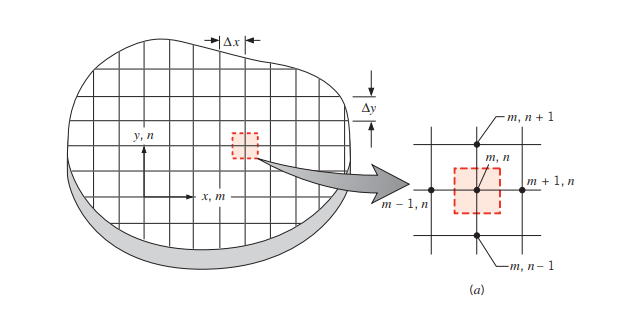

In [3]:
i = 4
j = 4

#FDM.Tem_array(i,j)를 이용하여 노드를 생성 할 수 있다.

FDM.Tem_array(i,j)[6]   

array([[T00, T01, T02, T03],
       [T04, T05, T06, T07],
       [T08, T09, T10, T11],
       [T12, T13, T14, T15]], dtype=object)

## 1-2)  Energy Balance method<br>


<p style = "font-size: 18px; line-height : 1.2em">FDM은 Energy Balance method으로 얻어낸다.  </p>
<p style = "font-size: 18px; line-height : 1.2em">노드에 대해서 모든 열 흐름이 노드 안쪽으로 흐른다고 가정하고  </p>
<p style = "font-size: 18px; line-height : 1.2em">에너지 방정식을 세운다면</p>

<p style = "font-size: 18px; line-height : 1.2em">정상상태 조건 하에 </p>
<p style = "font-size: 18px; line-height : 1.2em">$E_{in} - E_{gen} = 0$ 라는 식을 얻을 수 있다.</p>

**<p style = "font-size: 20px; line-height : 1.2em"> $$ \dot{E}_{in} - \dot{E}_{gen} = 0 $$ </p>**



## 1-3) E_in 과 E_gen  <br>

<p style = "font-size: 18px; line-height : 1.2em">그렇다면 $E_{in}$ 과 $E_{gen}$를 구하는 방법이 중요한데  </p>

<br>
<p style = "font-size: 18px; line-height : 1.2em">먼저 $E_{gen}$은 노드 안에서 생성되는 열로 생성열에 dx * dy * dz 를 곱해서 얻을 수 있으나, 2차원이므로 dz = 1 로 놓는다.</p>
<br>

**<p style = "font-size: 20px; line-height : 1.2em"> $$ q_{gen} = \dot{q} * \vartriangle{x} * \vartriangle{y} * 1 $$ </p>**
<br>

<p style = "font-size: 18px; line-height : 1.2em">$E_{in}$은 경계면에서 들어오는 열이다.</p> 
<br>

<p style = "font-size: 18px; line-height : 1.2em">즉 열전달 공식을 통해서 구할수 있으며, 열전달로는 전도,대류,복사 열전달 공식을 사용하면 된다.</p>

<p style = "font-size: 18px; line-height : 1.2em">4면이 있으므로 각 면에서 들어오는 열의 합을 $E_{in}$ 이라고 놓으면 된다.</p>


**<p style = "font-size: 20px; line-height : 1.2em"> $$ E_{in} = q_{(m-1,n)\rightarrow(m,n)}+q_{(m+1,n)\rightarrow(m,n)}+q_{(m,n+1)\rightarrow(m,n)}+q_{(m,n-1)\rightarrow(m,n)} $$ </p>**

**<p style = "font-size: 20px; line-height : 1.2em"> $$ \sum_{i=1}^4 q_{(i)\rightarrow(m,n)} + \dot{q} * \vartriangle{x} * \vartriangle{y} * 1  = 0$$ </p>**

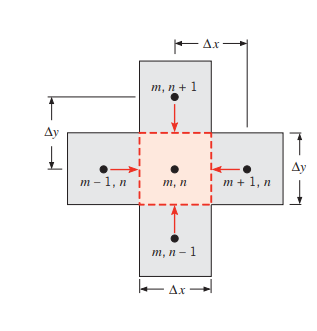

# **2. 경계조건** <br>


<p style = "font-size: 18px; line-height : 1.2em">여기서 경계조건이라는 것은 노드의 각 면에 대한 경계조건이라는 것이다. </p> 
<p style = "font-size: 18px; line-height : 1.2em">각 면에서 전달되는 열은 전도,대류,복사의 형태로 전달되게 된다.  </p>

<p style = "font-size: 18px; line-height : 1.2em">전도는 Fourier's Law  </p>
<p style = "font-size: 18px; line-height : 1.2em">대류는 Newton's Cooling Law</p>

<p style = "font-size: 18px; line-height : 1.2em">를 이용하여 열전달을 구할 수 있다.</p>

<p style = "font-size: 18px; line-height : 1.2em">또한 여기에서는 복사는 고려하지 않으며, 일정 열 유속이라는 경계조건이 추가된다.</p>  
<p style = "font-size: 18px; line-height : 1.2em">면으로 유입되는 Heat flux($q'' , J/m^2$) 으로 면적에 Heat flux를 곱하여 유입되는 열을 얻을 수 있다.</p>
<br>

## 2-1) 공식

<p style = "font-size: 18px; line-height : 1.2em">열전달 공식이다.</p>


**<p style = "font-size: 20px; line-height : 1.2em">- 전도 $\dot q = -kA{dT \over dx}$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">- 대류 $\dot q = hA(T_s - T_{\infty})$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">- 복사 $\dot q = -\varepsilon\sigma AT^4_s$</p>**


## 2-2) 예제

<p style = "font-size: 18px; line-height : 1.2em">다음은 중앙노드에 대해서 각면에 경계조건을 적용하였을때 나오는 에너지방정식을 구할 수 있는 코드이다.</p> 
<p style = "font-size: 18px; line-height : 1.2em"> 각 표면에 대한 조건은  </p>

**<p style = "font-size: 18px; line-height : 1.2em">- Conduction : 1  </p>**
**<p style = "font-size: 18px; line-height : 1.2em">- Convection : 2  </p>**
**<p style = "font-size: 18px; line-height : 1.2em">- qflux : 3  </p>**

<p style = "font-size: 18px; line-height : 1.2em">으로 설정되어 있다.</p>

<p style = "font-size: 18px; line-height : 1.2em">그러므로 FDM.FDM_practice 이라는 함수에 각 표면의  </p>
<p style = "font-size: 18px; line-height : 1.2em">경계조건만 입력하면 된다.</p>
<br>

<p style = "font-size: 18px; line-height : 1.2em"> $\blacktriangleright$ 예를 들어 FDM.FDM_practice(1,1,2,3) 은  </p>

**<p style = "font-size: 18px; line-height : 1.5em">표면1 $\Rrightarrow$ Conduction  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">표면2 $\Rrightarrow$ Conduction  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">표면3 $\Rrightarrow$ Convection  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">표면4 $\Rrightarrow$ qfulx  </p>**

<p style = "font-size: 18px; line-height : 1.2em">이고 함수를 실행시키면 그때의 애너지 방정식을 얻을 수 있다.</p>
<br>

><p style = "font-size: 18px; line-height : 1.2em">$q_{gen}$은 0으로 설정되어 있다. 그때의 내부 발생열이 없다는 의미이다.  </p>
><p style = "font-size: 18px; line-height : 1.2em">만일 $q_{gen}$의 값을 따로 설정해 준다면, 안에서 열이 발생할때의  </p>
><p style = "font-size: 18px; line-height : 1.2em">에너지 방정식도 얻을 수 있다.</p>

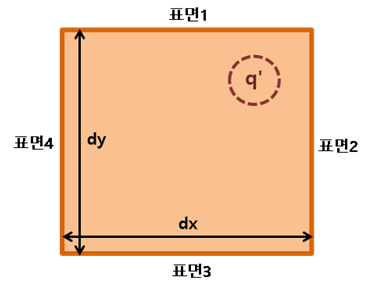


**<p style = "font-size: 20px; line-height : 1.2em">Example Code </p>**

<p style = "font-size: 18px; line-height : 1.2em">1. FDM.FDM_practice(1,1,2,3)  </p>
<p style = "font-size: 18px; line-height : 1.2em">2. FDM.FDM_practice(1,1,2,3,qgen= 0)  </p>
<p style = "font-size: 18px; line-height : 1.2em">3. FDM.FDM_practice(1,1,2,3,qgen= 5)  </p>

In [4]:
#2-2 Code

#여기에 조건을 바꾸어서 넣는다면, 그때의 조건에 맞는 에너지 방정식을
#얻을 수 있다.


FDM.FDM_practice(1,1,1,1,qgen= 0)


dx*k*(-T + T1)/dy + dx*k*(-T + T3)/dy + dy*k*(-T + T2)/dx + dy*k*(-T + T4)/dx

## 2-3) 연립 에너지 방정식 세우기
<br>

<p style = "font-size: 18px; line-height : 1.2em">위의 코드를 이용하여, 한 노드의 온도를 구하는 식을 얻을 수 있었다. </p> 
<p style = "font-size: 18px; line-height : 1.2em">하지만 FDM_practice(1,1,1,1)의 해(T)를 얻기위해서는 T1,T2,T3,T4의 온도를 알아야 T를 구할 수 있다.</p>

<p style = "font-size: 18px; line-height : 1.2em">그렇다면 T1,T2,T3,T4를 얻기위하여 또 각각의 노드에 에너지 방정식을 세워보자.</p>

<br>
<p style = "font-size: 18px; line-height : 1.2em">2X2 노드, 표면온도가 100,200,300,400 일때인 상황을 가정해 보자.  </p>
<p style = "font-size: 18px; line-height : 1.2em">그리고 먼저 이를 노드로 나타내면 다음과 같다. </p>



In [5]:
#Example2-3-1
#각각에 경계조건을 넣어주면 된다.

FDM.value[0] = 2.0       #dx
FDM.value[1] = 1.0       #dy
FDM.value[2] = 100.0     #k

#표면1
FDM.Tem_S[0] = 100
FDM.Tem_A[0] = "x"
FDM.h[0]= "x"
FDM.q[0]= "x"

#표면2
FDM.Tem_S[1] = 200
FDM.Tem_A[1] = "x"
FDM.h[1]= "x"
FDM.q[1]= "x"

#표면3
FDM.Tem_S[2] = 300
FDM.Tem_A[2] = "x"
FDM.h[2]= "x"
FDM.q[2]= "x"

#표면4
FDM.Tem_S[3] = 400
FDM.Tem_A[3] = "x"
FDM.h[3]= "x"
FDM.q[3]= "x"



FDM.Tem_array(4,4)[5]

array([[T00, 100.0, 100.0, T03],
       [400.0, T05, T06, 200.0],
       [400.0, T09, T10, 200.0],
       [T12, 300.0, 300.0, T15]], dtype=object)

**<p style = "font-size: 20px; line-height : 1.2em">Example  2-3)방정식 세우기 </p>**
<br>

<p style = "font-size: 18px; line-height : 1.2em">위의 경우에 대해서 T5,T6,T9,T10의 온도를 구하는 에너지 방정식을 세워보자. </p>  

<p style = "font-size: 18px; line-height : 1.2em">여기에는 T5,T6,T9,T10이라는 4개의 미지수가 있고   </p>
<p style = "font-size: 18px; line-height : 1.2em">에너지방정식도 4개를 세울 수 있으므로 이는 연립시켜 풀 수 가 있다. </p>

<p style = "font-size: 18px; line-height : 1.2em">또한 꼭지점에도 미지수가 있으나 이는 평균을 이용하여 구할 수 있고   </p>
<p style = "font-size: 18px; line-height : 1.2em">더 자세한 내용은 아래에 있다. </p>

<p style = "font-size: 18px; line-height : 1.2em">아래 있는 코드는 각 노드의 온도를 구하는데 필요한 식을 불러오는 코드이다.  </p> 
<p style = "font-size: 18px; line-height : 1.2em">아까 생성한 노드 FDM.Tem_array(4,4)를   </p>
<p style = "font-size: 18px; line-height : 1.2em">FDM.Eq_array()에 넣으면 노드의 온도를 구하는데 필요한 식을 구해준다.   </p>



In [6]:
#Example2-3-2 각 Node 온도를 구하는 방정식 세우기.

FDM.Eq_array(FDM.Tem_array(4,4))


(250.0 - T00,
 0,
 0,
 150.0 - T03,
 0,
 -T05 + T06/4 + T09/4 + 125.0,
 T05/4 - T06 + T10/4 + 75.0,
 0,
 0,
 T05/4 - T09 + T10/4 + 175.0,
 T06/4 + T09/4 - T10 + 125.0,
 0,
 350.0 - T12,
 0,
 0,
 250.0 - T15)

## 2-4) 연립방정식  풀기
<br>

<p style = "font-size: 18px; line-height : 1.2em">위에서 얻은 식을 연립하여 계산할때 sympy 라이브러리의 solve 기능을 이용한다. </p> 
<p style = "font-size: 18px; line-height : 1.2em">solve를 통해서 간단하게 연립방정식의 계산을 진행 할 수 있다.</p>

<p style = "font-size: 18px; line-height : 1.2em">solve(FDM.Eq_array(FDM.Tem_array(4,4)))를 입력하면된다.</p>
<p style = "font-size: 18px; line-height : 1.2em">즉 처음에 만들었던 Node를 FDM.Eq_array()에 넣어서 방정식을 구하고 이를 solve를 이용하여 연립시켜 해를 구하는 방식이다.  </p>
<br>
<p style = "font-size: 18px; line-height : 1.2em">아래의 코드를 살펴보자.</p>


In [7]:
#연립방정식 풀기..
#solve에 tuple형식으로 연립방정식을 넣어주면 그때의 해를 얻을 수 있다.

solve(FDM.Eq_array(FDM.Tem_array(4,4)))

{T00: 250.000000000000,
 T03: 150.000000000000,
 T05: 250.000000000000,
 T06: 200.000000000000,
 T09: 300.000000000000,
 T10: 250.000000000000,
 T12: 350.000000000000,
 T15: 250.000000000000}

## 2-5) 결과를 Node에 대입하기
<br>

<p style = "font-size: 18px; line-height : 1.2em">위에서 연립시켜 얻은 해를 다시 Node에 대입한다면.이제 결과를 한눈에 볼 수 있다.</p>  
<p style = "font-size: 18px; line-height : 1.2em">단순히 Array로 보는것보다, Heat map을 이용해서 한눈에 들어오도록 할 수 있다.</p>
<br>

<p style = "font-size: 18px; line-height : 1.2em">코드는 아래와 같다.  </p>

**<p style = "font-size: 18px; line-height : 1.2em">FDM.Ploting(4,4)</p>**

<br>
<p style = "font-size: 18px; line-height : 1.2em">위에서 먼저 경계조건을 다 입력 해 놓았으므로, </p> 
<p style = "font-size: 18px; line-height : 1.2em">단순하게 Ploting(i,j)을 입력하여 그래프를 띄울 수 있다. </p> 
<p style = "font-size: 18px; line-height : 1.2em">여기에서 i과 j 은 처음에 입력했던 노드의 i,j값을 똑같이 입력하면 된다.</p>


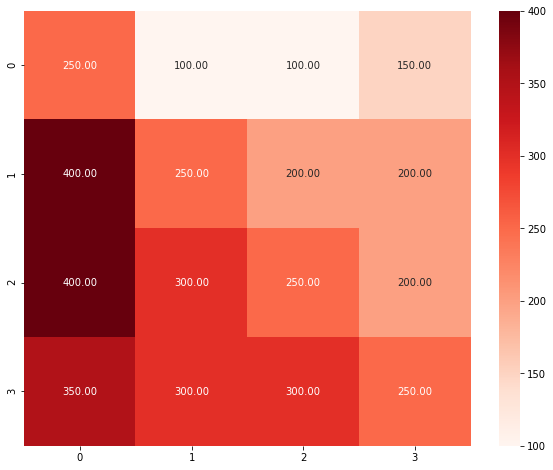

In [8]:
#Example 2-5-1 결과 그래프로 확인하기.

FDM.Ploting(4,4)

## 2-6) 또 다른 경계조건 사용하기

<p style = "font-size: 18px; line-height : 1.2em">여태까지 위에서 한것은 경계조건이 모두 일정표면온도인 경우에 대해서  </p>
<p style = "font-size: 18px; line-height : 1.2em">에너지 방정식을 세우고 풀이를 진행한 것 이다. 
<p style = "font-size: 18px; line-height : 1.2em">하지만 다른 경계조건에 대해서도 결과를 얻을 수 있다. </p>
<br>

**<p style = "font-size: 18px; line-height : 1.2em"> CASE1)</p>**

**<p style = "font-size: 18px; line-height : 1.5em">S1 = 100K, 일정표면온도  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">S2 = 대류조건 $\Rightarrow$ 공기온도 500 , h값 200  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">S3 = 일정 열유속 $\Rightarrow$ q = 200  </p>**
**<p style = "font-size: 18px; line-height : 1.5em">S4 = 100K, 일정표면온도  </p>**
<p style = "font-size: 18px; line-height : 1.2em">일때의 결과를 얻어보자.  </p>


<p style = "font-size: 18px; line-height : 1.2em">결과를 얻는 순서는 동일하다.  </p>
<p style = "font-size: 18px; line-height : 1.2em">먼저 Node와 경계조건을 세우고 그다음 방정식을 세우고 그래프로 확인 하면 된다.</p>


<p style = "font-size: 18px; line-height : 1.2em">코드는 아래와 같다. </p>

In [9]:
# Node 제작하고 경계조건을 대입한다.

#표면1
FDM.Tem_S[0] = 100
FDM.Tem_A[0] = "x"
FDM.h[0]= "x"
FDM.q[0]= "x"

#표면2
FDM.Tem_S[1] = "x"
FDM.Tem_A[1] = 500
FDM.h[1]= 200
FDM.q[1]= "x"

#표면3
FDM.Tem_S[2] = "x"
FDM.Tem_A[2] = "x"
FDM.h[2]= "x"
FDM.q[2]= 200

#표면4
FDM.Tem_S[3] = 100
FDM.Tem_A[3] = "x"
FDM.h[3]= "x"
FDM.q[3]= "x"


print(FDM.Tem_array(10,10)[5])
FDM.Tem_array(10,10)

[[T00 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 T09]
 [100.0 T11 T12 T13 T14 T15 T16 T17 T18 T19]
 [100.0 T21 T22 T23 T24 T25 T26 T27 T28 T29]
 [100.0 T31 T32 T33 T34 T35 T36 T37 T38 T39]
 [100.0 T41 T42 T43 T44 T45 T46 T47 T48 T49]
 [100.0 T51 T52 T53 T54 T55 T56 T57 T58 T59]
 [100.0 T61 T62 T63 T64 T65 T66 T67 T68 T69]
 [100.0 T71 T72 T73 T74 T75 T76 T77 T78 T79]
 [100.0 T81 T82 T83 T84 T85 T86 T87 T88 T89]
 [T90 T91 T92 T93 T94 T95 T96 T97 T98 T99]]


array([[[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0,
         'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'],
        [100.0, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']],

       [['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 500.0],
        ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 500.0],
        ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 500.0],
        ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 500.0],
        ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 500.0],
        ['x', 'x', 'x', 'x', 'x', 'x', 'x',

### 2-6-1)  Array 해석
<br>

<p style = "font-size: 18px; line-height : 1.2em">위에서 생긴 여러가지 Array를 확인하여 보자.  </p>
<p style = "font-size: 18px; line-height : 1.2em">먼저 Array의 순서대로</p>

**<p style = "font-size: 18px; line-height : 1.5em"> z = 0 $\Rightarrow$ 각 지점별 표면온도  </p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 1 $\Rightarrow$ 공기온도  </p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 2 $\Rightarrow$ h  </p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 3 $\Rightarrow$ q  </p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 4 $\Rightarrow$ $q_{gen}$</p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 5 $\Rightarrow$ Node  </p>**
**<p style = "font-size: 18px; line-height : 1.5em"> z = 6 $\Rightarrow$ symbols  </p>**
 
<p style = "font-size: 18px; line-height : 1.2em">이 대입되어 있는 것을 확인 할 수 있다.</p>  
<p style = "font-size: 18px; line-height : 1.2em">이 값들은 방정식을 세우는데 필요하기에 Array에 포함되어 있고, 실제 방정식을 세우는데 필요한 Array는  </p>
<p style = "font-size: 18px; line-height : 1.2em">FDM.Tem_array(3,3)[5] 여기 5번째 Array이다.</p>

<p style = "font-size: 18px; line-height : 1.2em">아래의 코드에서 확인하자.</p>

In [10]:
#위에서 노드를 생성했고, 경계조건도 입력하였다.
#그리고 생성된 노드를 아래의 print()를 써서 확인 한 것이다.


print(FDM.Tem_array(10,10)[5])

[[T00 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 T09]
 [100.0 T11 T12 T13 T14 T15 T16 T17 T18 T19]
 [100.0 T21 T22 T23 T24 T25 T26 T27 T28 T29]
 [100.0 T31 T32 T33 T34 T35 T36 T37 T38 T39]
 [100.0 T41 T42 T43 T44 T45 T46 T47 T48 T49]
 [100.0 T51 T52 T53 T54 T55 T56 T57 T58 T59]
 [100.0 T61 T62 T63 T64 T65 T66 T67 T68 T69]
 [100.0 T71 T72 T73 T74 T75 T76 T77 T78 T79]
 [100.0 T81 T82 T83 T84 T85 T86 T87 T88 T89]
 [T90 T91 T92 T93 T94 T95 T96 T97 T98 T99]]


### 2-6-2)  방정식 세우고 결과로 확인하기.
<br>

<p style = "font-size: 18px; line-height : 1.2em">위의 방법과 동일하게 생성한 FDM.Tem_array(3,3)를</p>  
<p style = "font-size: 18px; line-height : 1.2em">FDM.Eq_array()에 대입하면 된다.  </p>
<p style = "font-size: 18px; line-height : 1.2em">그리고 다시 그 결과를 FDM.Ploting 하면 된다.</p>

<br>
<p style = "font-size: 18px; line-height : 1.2em">코드는 아래와 같다.</p>

**<p style = "font-size: 18px; line-height : 1.2em">FDM.Eq_array(FDM.Tem_array(3,3))  </p>**
**<p style = "font-size: 18px; line-height : 1.2em">FDM.Ploting(3,3)</p>**


In [11]:
#방정식 세우는 코드...

FDM.Eq_array(FDM.Tem_array(3,3))

(100.0 - T00,
 0,
 -225.0*T02 + 100.0*T05 + 52500.0,
 0,
 -T04 + T05/4 + T07/4 + 50.0,
 200.0*T02 + 50.0*T04 - 650.0*T05 + 200.0*T08 + 100000.0,
 -125.0*T06 + 25.0*T07 + 10200.0,
 200.0*T04 + 50.0*T06 - 300.0*T07 + 50.0*T08 + 400.0,
 50.0*T05 + 25.0*T07 - 275.0*T08 + 100400.0)

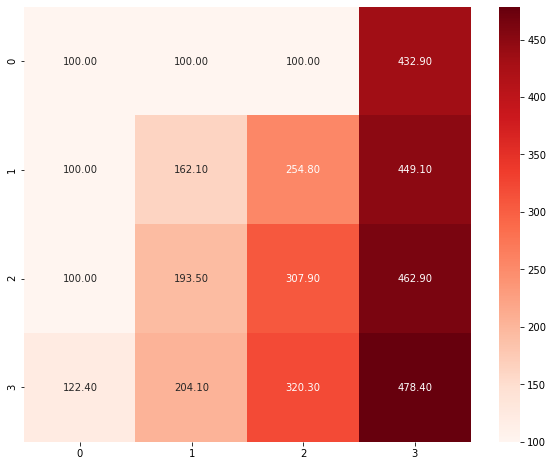

In [12]:
# 그래프 확인하기

FDM.Ploting(4,4)

# **3. 꼭지점의 에너지 방정식**
<br>

<p style = "font-size: 18px; line-height : 1.2em">위에서 나와있는 공식에는 꼭지점의 온도를 구할 수 있는 방법은 제시 되지 않았다.</p>  
<p style = "font-size: 18px; line-height : 1.2em">하지만 위에 나와있는 원리를 응용하여 똑같은 방법으로 얻을 수 있다.</p>


<p style = "font-size: 18px; line-height : 1.2em">하지만 먼저 설정한 노드의 크기와 실제로 열전달이 일어나는 표면이 다르고,</p>  
<p style = "font-size: 18px; line-height : 1.2em">한 노드에 대하여 두가지 면의 경계 조건이 다르다는 차이점이 있다.</p>

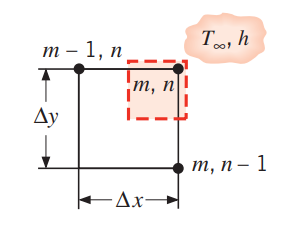

## 3-1) 꼭지점 경우의 수
<br>

<p style = "font-size: 18px; line-height : 1.2em">한 면에 대하여 경계조건이 3가지 이기 때문에 이를 이용하여 꼭지점에 에너지방정식을 세우면 나오는 결과가 아래와 같다.  </p>

**<p style = "font-size: 18px; line-height : 1.2em">case 1) 양쪽 표면온도 </p>**

**<p style = "font-size: 18px; line-height : 1.2em">case 2) 양쪽 대류 </p>**

**<p style = "font-size: 18px; line-height : 1.2em">case 3) 양쪽 일정 열유속 </p>**

**<p style = "font-size: 18px; line-height : 1.2em">case 4) 일정표면온도 + 대류 </p>**

**<p style = "font-size: 18px; line-height : 1.2em">case 5) 일정표면온도 + 열 </p>**

**<p style = "font-size: 18px; line-height : 1.2em">case 6) 대류 + 열 </p>**


## 3-2) 각 경계조건 확인하기
<br>

<p style = "font-size: 18px; line-height : 1.2em">각각의 상황을 가지고 애너지 방정식을 세우면 꼭지점의 온도를 구하는 식을 얻을 수 있다. </p>

<p style = "font-size: 18px; line-height : 1.2em">아래에 코드에 원하는 조건을 넣어보자. </p>

In [13]:
#EXAMPLE3-1-1
#표면1과 표면2사이의 꼭지점에대한 애너지 방정식을 얻을 것 이다.

#표면1
FDM.Tem_S[0] = 100
FDM.Tem_A[0] = "x"
FDM.h[0]= "x"
FDM.q[0]= "x"

#표면2
FDM.Tem_S[1] = "x"
FDM.Tem_A[1] = 500
FDM.h[1]= 200
FDM.q[1]= "x"

#FDM.Eq_array(FDM.Tem_array(3,3),(1,3)) 를 이용하여
#Eq_array (1,3) 값을 출력 할 수 있다. 3X3 Array 이므로 1,3 지점이
#Coner2 --> 표면1,2사이의 꼭지점이다.

FDM.Eq_array(FDM.Tem_array(10,10),(1,3))

0


(100.0 - T00,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -225.0*T09 + 100.0*T19 + 52500.0,
 0,
 -T11 + T12/4 + T21/4 + 50.0,
 T11/4 - T12 + T13/4 + T22/4 + 25.0,
 T12/4 - T13 + T14/4 + T23/4 + 25.0,
 T13/4 - T14 + T15/4 + T24/4 + 25.0,
 T14/4 - T15 + T16/4 + T25/4 + 25.0,
 T15/4 - T16 + T17/4 + T26/4 + 25.0,
 T16/4 - T17 + T18/4 + T27/4 + 25.0,
 T17/4 - T18 + T19/4 + T28/4 + 25.0,
 200.0*T09 + 50.0*T18 - 650.0*T19 + 200.0*T29 + 100000.0,
 0,
 T11/4 - T21 + T22/4 + T31/4 + 25.0,
 T12/4 + T21/4 - T22 + T23/4 + T32/4,
 T13/4 + T22/4 - T23 + T24/4 + T33/4,
 T14/4 + T23/4 - T24 + T25/4 + T34/4,
 T15/4 + T24/4 - T25 + T26/4 + T35/4,
 T16/4 + T25/4 - T26 + T27/4 + T36/4,
 T17/4 + T26/4 - T27 + T28/4 + T37/4,
 T18/4 + T27/4 - T28 + T29/4 + T38/4,
 200.0*T19 + 50.0*T28 - 650.0*T29 + 200.0*T39 + 100000.0,
 0,
 T21/4 - T31 + T32/4 + T41/4 + 25.0,
 T22/4 + T31/4 - T32 + T33/4 + T42/4,
 T23/4 + T32/4 - T33 + T34/4 + T43/4,
 T24/4 + T33/4 - T34 + T35/4 + T44/4,
 T25/4 + T34/4 - T35 + T36/4 + T45/4,
 T26/4 + T

# **4. GUI 사용하기**

<p style = "font-size: 18px; line-height : 1.2em">매번 결과를 확인할 때 코드를 이용하여 바꾸는게 불편할까봐 GUI를 제작해 놓았다. </p>
<p style = "font-size: 18px; line-height : 1.2em">실행시키고 각 영역에 필요한 값을 적어 넣으면 된다.  </p>
<p style = "font-size: 18px; line-height : 1.2em">다만 필요한 값이 아니라면 초기값인 0 그대로 두어야 한다.  </p>

<p style = "font-size: 18px; line-height : 1.2em">계산버튼을 누르면 아래에 결과가 Heat Map으로 나타난다.</p>


In [1]:
import gui
gui.Win_show()

